In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import multivariate_normal

In [4]:
# matplotlibのグラフをRetinaの高解像度で表示する方法
%config InlineBackend.figure_format = 'retina'

# rcParamsで設定するとそれ以降の全てのグラフに対して適応されますが、
# 関数の引数などではまさにその関数で行うことにしか適応されません
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# 小数点以下4桁まで表示
np.set_printoptions(precision=4)

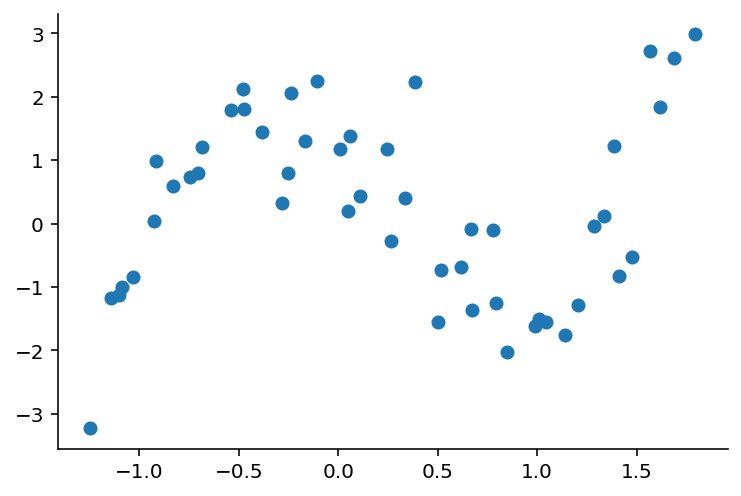

In [8]:
# sampleデータを生成しているそうです
np.random.seed(23)
n_obs = 50 #点の数
sigma = 0.8  # sigma is a known value
x = np.linspace(-1.3, 1.7, n_obs) + np.random.rand(n_obs) * 0.1
y = 1 - 3 * x - 2 * x ** 2 + 2.5 * x ** 3 + np.random.randn(n_obs) * sigma   #この式はどんな関数と似ているかまだわからない

plt.scatter(x, y)

In [7]:
np.random.seed(314)

n_obs = 20
print(np.random.randn(n_obs))　　　#ランダム数を生成する

[ 0.1661  0.782   0.8523 -0.7071 -0.9317  0.8867 -0.2218  0.3817 -0.7726
  0.863  -0.2813 -0.9319 -0.4985  0.7643  0.1915 -0.6188  1.6657  1.7382
  1.1822  1.1194]


In [9]:
x

array([-1.2483, -1.1441, -1.101 , -1.0881, -1.033 , -0.9253, -0.9159,
       -0.8322, -0.7484, -0.7078, -0.6875, -0.5381, -0.4768, -0.474 ,
       -0.3839, -0.2838, -0.2359, -0.2527, -0.1685, -0.1079,  0.0067,
        0.0483,  0.058 ,  0.1082,  0.2636,  0.2448,  0.334 ,  0.3877,
        0.5013,  0.5184,  0.6196,  0.6697,  0.6711,  0.78  ,  0.7946,
        0.8506,  0.9872,  1.0117,  1.0427,  1.1426,  1.2078,  1.2876,
        1.337 ,  1.3884,  1.4117,  1.4792,  1.5669,  1.6172,  1.6871,
        1.7956])

In [12]:
# 複数のNumPy配列ndarrayを結合（連結）する。numpy.stack()で新たな軸（次元）に沿って結合
X = np.stack((np.ones_like(x), x, x ** 2, x ** 3), axis=1)
X[:5]

array([[ 1.    , -1.2483,  1.5582, -1.945 ],
       [ 1.    , -1.1441,  1.3089, -1.4975],
       [ 1.    , -1.101 ,  1.2122, -1.3347],
       [ 1.    , -1.0881,  1.1839, -1.2882],
       [ 1.    , -1.033 ,  1.0671, -1.1023]])

In [17]:
# 対角成分が1で非対角成分が0の行列を単位行列という
# np.eye(3)だと3×3の単位行列を意味する
α = 1.2
m = 4
Σ0 = np.eye(m) * α # 4×4の単位行列 * α
μ0 = np.zeros((m, 1))

In [16]:
print('eye(m)',np.eye(m))
print('Σ0',Σ0)
print('μ0',μ0)

eye(m) [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Σ0 [[1.2 0.  0.  0. ]
 [0.  1.2 0.  0. ]
 [0.  0.  1.2 0. ]
 [0.  0.  0.  1.2]]
μ0 [[0.]
 [0.]
 [0.]
 [0.]]


# 多変数ガウス分布の平均ベクトルと共分散行列を生成する

In [15]:
# inv関数は逆行列を求める, inv(Σ0)はΣ0の逆行列
SN_inv = inv(Σ0) + X.T @ X / sigma  ** 2
SN = inv(SN_inv)

mN = SN @ (inv(Σ0) @ μ0 + X.T @ y[:, None] / sigma ** 2)
# The vector of average weights
mN

array([[ 0.945 ],
       [-2.3875],
       [-1.6163],
       [ 2.0604]])

In [26]:
print(SN_inv[:4])
print(SN[:4])
print(mN)

[[1100.8333 1500.     1900.     2800.    ]
 [1500.     2200.8333 2900.     3900.    ]
 [1900.     2900.     3900.8333 5000.    ]
 [2800.     3900.     5000.     8900.8333]]
[[ 2.0642e-01 -3.9836e-01  1.9686e-01 -9.7420e-04]
 [-3.9836e-01  8.0055e-01 -4.0054e-01 -4.5172e-04]
 [ 1.9686e-01 -4.0054e-01  2.0206e-01  7.0764e-05]
 [-9.7420e-04 -4.5172e-04  7.0764e-05  5.7698e-04]]
[[ 0.945 ]
 [-2.3875]
 [-1.6163]
 [ 2.0604]]


In [ ]:
n_test = 100
xtest = np.linspace(-1.3, 1.8, n_test)
Xtest = np.stack((np.ones_like(xtest), xtest, xtest ** 2, xtest ** 3))

In [33]:
n_samples = 20
# We create an instance of our random vector w
w = multivariate_normal(mean=mN.ravel(), cov=SN)
w_sample = w.rvs(n_samples)

Text(0.5, 1.0, 'Posterior Samples')

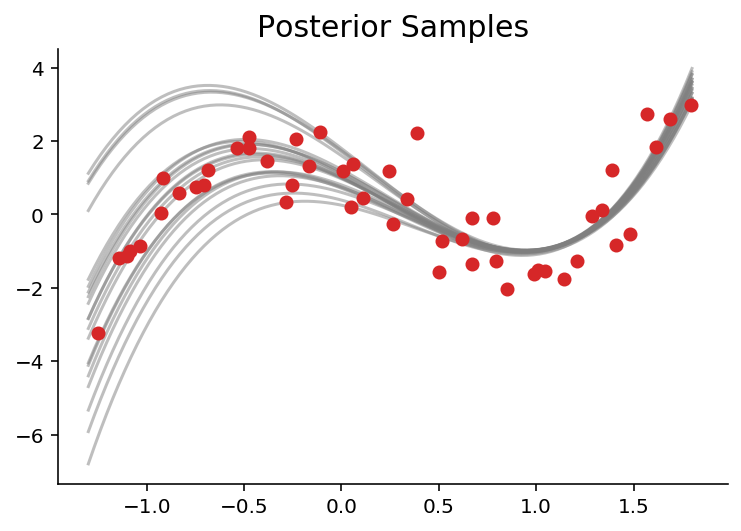

In [34]:
y_test_sample = np.einsum('km, mn->nk', w_sample, Xtest)

plt.plot(xtest, y_test_sample, c='tab:gray', alpha=0.5, zorder=1) # テストの線を書く
plt.scatter(x, y, c='tab:red', zorder=2)
plt.title('Posterior Samples', fontsize=15)

In [ ]:
# printを使うと一覧を確認することができます
print(plt.rcParams)